<center><h1>Sensor Analysis</h1>
<h2>Matthias Bartolo</h2>

</center>

### Package Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2
import pandas as pd

### Plotting Sensor FOV

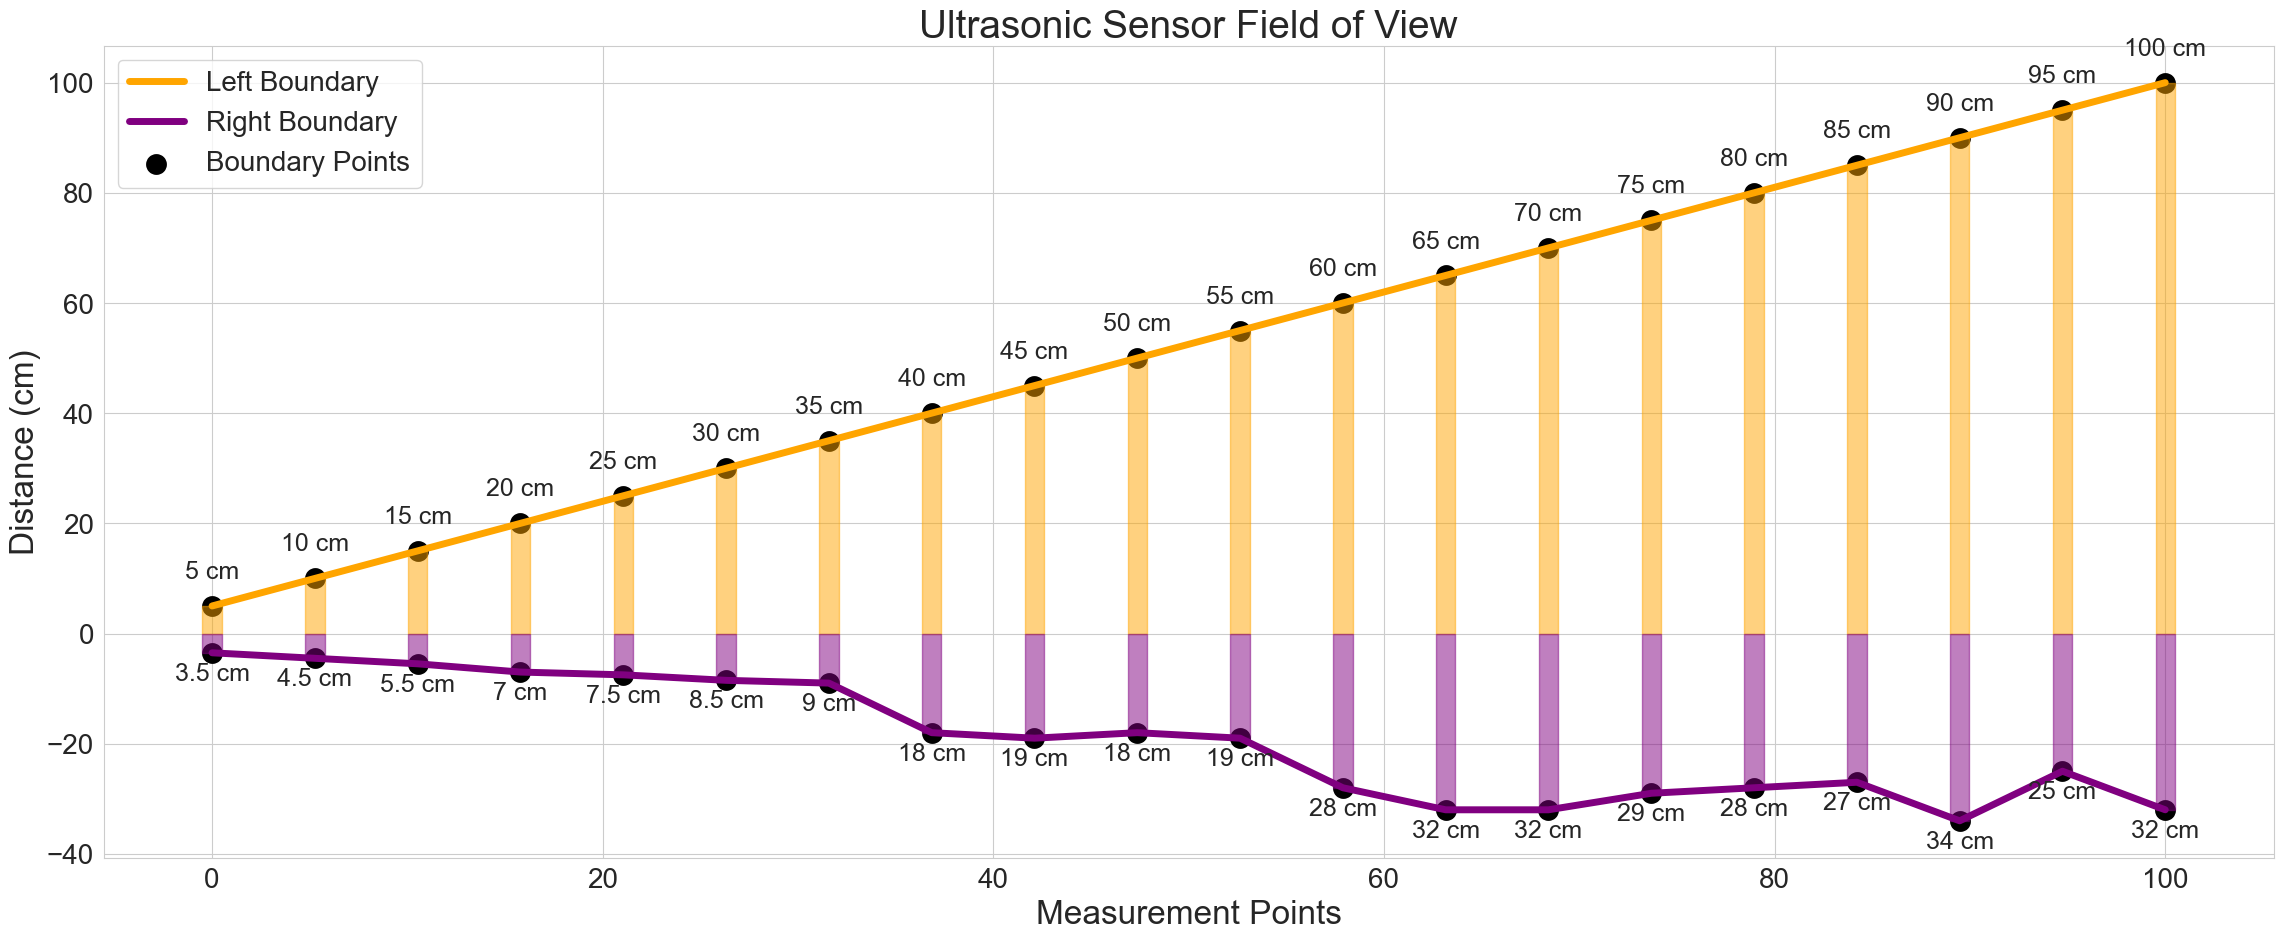

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import cv2
import numpy as np

# Defining the robot image 
robot_image = cv2.imread("../../../Assets/Elegoo_smart_car_robot.png")
robot_image = cv2.cvtColor(robot_image, cv2.COLOR_BGR2RGB)
robot_image = np.fliplr(robot_image)

# Defining distances
min_distance = 2
max_distance = 1183

# Sensor Boundaries
left_boundary = list(range(5, 105, 5))
right_boundary = [-3.5, -4.5, -5.5, -7, -7.5, -8.5, -9, -18, -19, -18, -19, -28, -32, -32, -29, -28, -27, -34, -25, -32]
x = np.linspace(0, 100, len(right_boundary))

# Using the seaborn plotting style
sns.set_style("whitegrid")

# Create a new figure
fig, ax = plt.subplots(figsize=(28, 14))

# Plot lines for left and right boundaries
ax.plot(x, left_boundary, color='orange', linewidth=5, label='Left Boundary')
ax.plot(x, right_boundary, color='purple', linewidth=5, label='Right Boundary')

# Plot small bars at boundary points
ax.scatter(x, left_boundary, color='black', s=100, label='Boundary Points', linewidths=5)
ax.scatter(x, right_boundary, color='black', s=100, linewidths=5)

# Adding bars starting from 0 to each boundary point
for i in range(len(left_boundary)):
    ax.add_patch(patches.Rectangle((x[i] - 0.5, 0), 1, left_boundary[i], color='orange', alpha=0.5))
    ax.add_patch(patches.Rectangle((x[i] - 0.5, 0), 1, right_boundary[i], color='purple', alpha=0.5))

    # Plotting values on top of the bars
    ax.text(x[i], left_boundary[i] + 5, f'{left_boundary[i]} cm', ha='center', fontsize=18)
    ax.text(x[i], right_boundary[i] - 5, f'{abs(right_boundary[i])} cm', ha='center', fontsize=18)

# Adding a small robot image at the origin
robot_width = 10
robot_height = 5
# Resizing the robot image
robot_image = cv2.resize(robot_image, (robot_width, robot_height))
# Adding the robot image to the plot
# ax.imshow(robot_image, extent=[-robot_width/2, robot_width/2, 0, robot_height])

# Adding title
plt.title('Ultrasonic Sensor Field of View', fontsize=28)

# Adding legend
ax.legend(fontsize=20)

# Increasing Axis font size
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

# Creating a dataframe for the table
df = pd.DataFrame({'Left Boundary': left_boundary, 'Right Boundary': right_boundary})
# Transposing the dataframe
df = df.T

plt.ylabel('Distance (cm)', fontsize=24)
plt.xlabel('Measurement Points', fontsize=24)
plt.subplots_adjust(bottom=0.3)  # Adjust the spacing between the table and plot

# Display the plot
plt.show()
